In [1]:
!pip install mapclassify
!pip install geopandas

  Using cached geopandas-0.7.0-py2.py3-none-any.whl (928 kB)
  Using cached Shapely-1.7.0-cp37-cp37m-macosx_10_9_x86_64.whl (1.6 MB)
  Using cached Fiona-1.8.13.post1-cp37-cp37m-macosx_10_9_x86_64.whl (13.9 MB)
     |████████████████████████████████| 13.0 MB 274 kB/s eta 0:00:01     |██████████████████████████▎     | 10.7 MB 65 kB/s eta 0:00:36


In [2]:
import zipfile
from zipfile import ZipFile

import matplotlib
%matplotlib inline
import geopandas as gpd
import mapclassify

import pandas as pd

# Learning objectives

1. Understand geospatial data in Python
2. Download map of USA and plot it; do the same thing with States and California counties
3. Learn how to join population data with the spatial-geometric data

# Introduction to geospatial data in Python

"[GeoPandas](https://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting."

![geo1](../../Img/Geo1.png)

![geo2](../../Img/Geo2.png)

![geo3](../../Img/Geo3.png)

![geo4](../../Img/Geo4.png)

![geo5](../../Img/Geo5.png)

![geo6](../../Img/Geo6.png)

![geo7](../../Img/Geo7.png)

![geo8](../../Img/Geo8.png)

![geo9](../../Img/Geo9.png)

![geo10](../../Img/Geo10.png)

![geo11](../../Img/Geo11.png)

![geo12](../../Img/Geo12.png)

# DIVA (Data-Interpolating Variational Analysis)

[DIVA-GIS](https://www.diva-gis.org/gdata) is an excellent website for downloading free geographic (GIS) data for any country in the world. The [DIVA-GIS software manual](https://www.diva-gis.org/docs/DIVA-GIS_manual_7.pdf) is worth a read as well. 

### USA example
1. Create a folder named USA (or whatever country/state/region you are working with) in your DIGHUM101-2019 directory (this has already been done for you)
2. Visit [DIVA-GIS](https://www.diva-gis.org/gdata) and select "United States" from the "Country" dropdown menu
3. Select "Administrative Areas" from the "Subject" dropdown menu
4. Click "OK"
5. Click "Download"

### Unzip the file!

In [11]:
# Define a variable for the ZipFile function that contains the path to the zip file 
# NOTE: you may have to change your file paths to match
zf = ZipFile("../../Data/Geo/USA_adm.zip", "r")

# Use the extractall method with the file path where you want the extracted files to go
zf.extractall("./USA")

# Stop the process
zf.close()

### Define our shapefile

Shapefiles contain the geometric data!

In [12]:
usa = gpd.read_file("../../Notebooks/Week3/USA/USA_adm0.shp")
print(type(usa))
usa

<class 'geopandas.geodataframe.GeoDataFrame'>


,ID_0,ISO,NAME_0,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,244,USA,United States,238,USA,United States,UNITED STATES,United States of America,United States,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-155.84998 20.26800, -155.8494..."


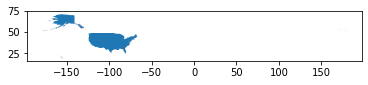

In [17]:
# Plot it!
usa.plot()

# State boundaries

Now we need to get the state boundaries to overlay on this map. Visit this URL to download them: https://raw.githubusercontent.com/dlab-geo/geopandas_intro/master/data/us_states.zip

In [21]:
# Read the file
# Note this other zip convention
state_boundaries = gpd.read_file("zip://../../Data/Geo/us_states.zip")
state_boundaries.head()

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


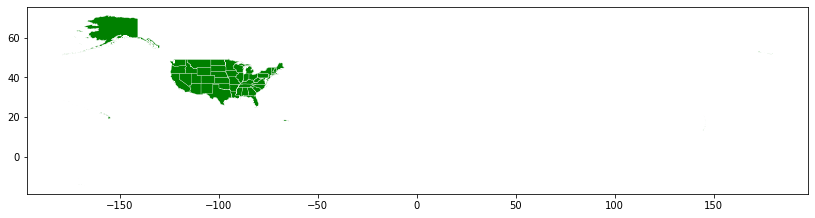

In [22]:
# Plot the state boundaries
state_boundaries.plot(
    # Width of boundary line
    linewidth=0.25, 
    
    # Boundary color line
    edgecolor='white', 
    
    # State color
    facecolor='green',
    
    # Figure size
    figsize=(14,10));

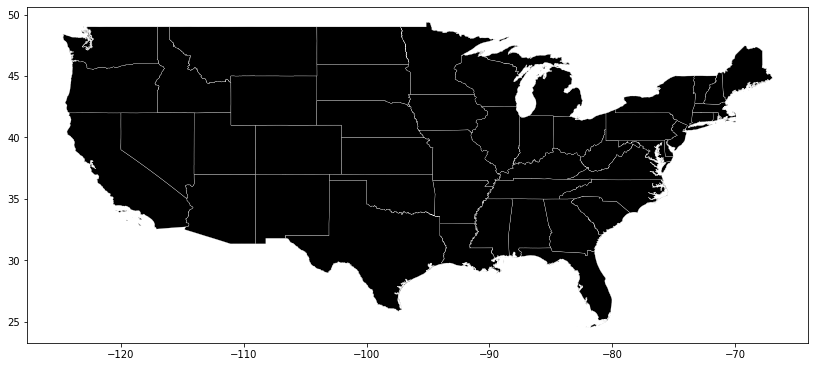

In [23]:
# Spatial subset of the contiguous US (zoom in!)
state_boundaries.cx[-130:-70,25:50].plot(linewidth=0.25, 
                                         edgecolor='white', 
                                         facecolor='black', 
                                         figsize=(14,10))

# Individual county polygons

To get individual state county boundaries, visit https://www.census.gov/geographies/mapping-files/2018/geo/carto-boundary-file.html

We want the file "cb_2018_us_county_5m.zip" What is California's STATEFP code? 

In [26]:
counties = gpd.read_file("zip://../../Data/Geo/cb_2018_us_county_5m.zip")
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


In [27]:
# Just california...
cal_counties = counties[counties["STATEFP"] == "06"]
cal_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
21,06,109,00277319,0500000US06109,06109,Tuolumne,06,5752079372,138722707,"POLYGON ((-120.65255 37.83346, -120.64407 37.8..."
51,06,103,01692767,0500000US06103,06103,Tehama,06,7638228750,33767783,"POLYGON ((-123.05927 40.28548, -123.04970 40.2..."
52,06,105,00277317,0500000US06105,06105,Trinity,06,8234265085,73407950,"POLYGON ((-123.61749 40.93114, -123.60956 40.9..."
114,06,069,00277299,0500000US06069,06069,San Benito,06,3596590995,4719296,"POLYGON ((-121.64400 36.89400, -121.62946 36.9..."


In [28]:
# Pull the state info for California
state_boundaries.head()

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [29]:
california = state_boundaries[state_boundaries["ABBREV"] == "CA"]

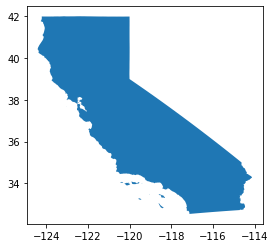

In [30]:
# Plot it
california.plot(); 

Visi the [Census Bureau website](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html)to get information about these counties. 

In [32]:
pop = pd.read_csv("../../Data/Geo/DEC_10_SF1_GCTPH1.ST05_with_ann.csv")
pop.head()

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic area,Geographic area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,0400000US06,6,California,0500000US06001,6001,California - Alameda County,Alameda County,1510271,582549,821.33,82.31,739.02,2043.6,788.3
1,0400000US06,6,California,0500000US06003,6003,California - Alpine County,Alpine County,1175,1760,743.18,4.85,738.33,1.6,2.4
2,0400000US06,6,California,0500000US06005,6005,California - Amador County,Amador County,38091,18032,605.96,11.37,594.58,64.1,30.3
3,0400000US06,6,California,0500000US06007,6007,California - Butte County,Butte County,220000,95835,1677.13,40.67,1636.46,134.4,58.6
4,0400000US06,6,California,0500000US06009,6009,California - Calaveras County,Calaveras County,45578,27925,1036.93,16.92,1020.01,44.7,27.4


In [33]:
# Add a zero to the new GEOID column
pop["GEOID"] = ["0" + str(x) for x in pop["Target Geo Id2"]]
pop.head()

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic area,Geographic area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,GEOID
0,0400000US06,6,California,0500000US06001,6001,California - Alameda County,Alameda County,1510271,582549,821.33,82.31,739.02,2043.6,788.3,06001
1,0400000US06,6,California,0500000US06003,6003,California - Alpine County,Alpine County,1175,1760,743.18,4.85,738.33,1.6,2.4,06003
2,0400000US06,6,California,0500000US06005,6005,California - Amador County,Amador County,38091,18032,605.96,11.37,594.58,64.1,30.3,06005
3,0400000US06,6,California,0500000US06007,6007,California - Butte County,Butte County,220000,95835,1677.13,40.67,1636.46,134.4,58.6,06007
4,0400000US06,6,California,0500000US06009,6009,California - Calaveras County,Calaveras County,45578,27925,1036.93,16.92,1020.01,44.7,27.4,06009


# Do the join!

Now we can combine `cal_counties` and `pop` because they have the same number of rows. 

In [34]:
pop.shape

(58, 15)

In [35]:
cal_counties.shape

(58, 10)

In [36]:
# cal_counties
# pop
geo_pop = cal_counties.merge(pop, on = "GEOID", how = "left")
geo_pop.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Target Geo Id2,Geographic area,Geographic area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",...,6003,California - Alpine County,Alpine County,1175,1760,743.18,4.85,738.33,1.6,2.4
1,06,109,00277319,0500000US06109,06109,Tuolumne,06,5752079372,138722707,"POLYGON ((-120.65255 37.83346, -120.64407 37.8...",...,6109,California - Tuolumne County,Tuolumne County,55365,31244,2274.43,53.55,2220.88,24.9,14.1
2,06,103,01692767,0500000US06103,06103,Tehama,06,7638228750,33767783,"POLYGON ((-123.05927 40.28548, -123.04970 40.2...",...,6103,California - Tehama County,Tehama County,63463,26987,2962.17,12.46,2949.71,21.5,9.1
3,06,105,00277317,0500000US06105,06105,Trinity,06,8234265085,73407950,"POLYGON ((-123.61749 40.93114, -123.60956 40.9...",...,6105,California - Trinity County,Trinity County,13786,8681,3207.60,28.34,3179.25,4.3,2.7
4,06,069,00277299,0500000US06069,06069,San Benito,06,3596590995,4719296,"POLYGON ((-121.64400 36.89400, -121.62946 36.9...",...,6069,California - San Benito County,San Benito County,55269,17870,1390.47,1.76,1388.71,39.8,12.9


# Plot

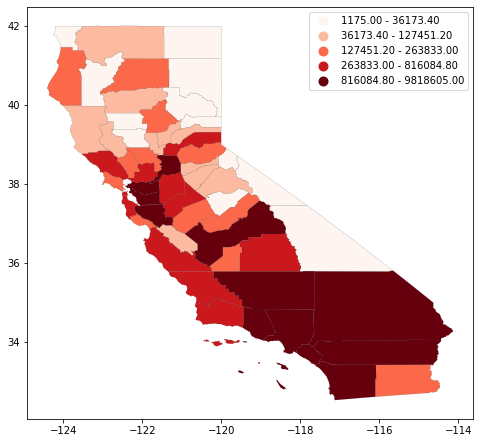

In [39]:
geo_pop.plot(
    # Which column to visualize?
    column = "Population", 
    
    # Which color palette to use?
    cmap = "Reds", 
    
    # What color should be used to separate the counties?
    edgecolor = "black", 
    
    # Width of the county boudary lines
    linewidth = 0.1, 
    
    # Change figure size
    figsize = (8, 8),
    
    # Add legend
    legend = True,
    
    # What do the different classifier schemes do? 
    scheme = "quantiles");

Visit the [this page](https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html) and pass in different schemes. How does `scheme = "Equal_Interval"` differ from "quantiles"? 

> HINT: This is how people [lie with maps](https://www.amazon.com/How-Lie-Maps-Mark-Monmonier/dp/0226534219)!

[Learn more here](https://github.com/pysal/mapclassify).

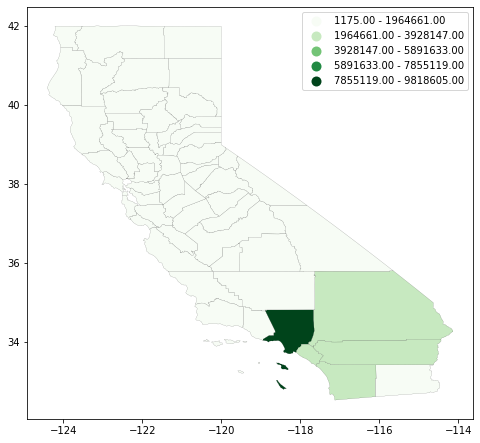

In [40]:
geo_pop.plot(column = "Population", 
             cmap = "Greens", 
             edgecolor = "black", 
             linewidth = 0.1, 
             scheme = "Equal_Interval", 
             legend = True, 
             figsize = (8,8));

# Going further

See if you can get the Geospatial Fundamentals in Python workshop materials to work!

https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python